# Creare Scatter Plots 2D e 3D con `Plotly Express`

## Caricamento librerie e dati

Verifica del kernel (istanza dell'interprete Python) in uso:

In [1]:
import sys
print(sys.executable)

C:\Users\Utente\anaconda3\envs\myenv\python.exe


Nell'ambiente virtuale `myenv` fare:<br>
`conda uninstall plotly`<br>
`conda install -c conda-forge plotly` <br> 
`-c` indica il canale (consigliato 'conda-forge')
- *defaults*: canale ufficiale di Anaconda
- *conda-forge*: community-driven, più aggiornato e ricco

In [2]:
import plotly

In [3]:
import plotly
print(plotly.__version__)

6.1.2


`plotly express` è semplicemente un modulo di `plotly`, più semplice da usare.<br>
Non richiede installazione / import separati. Se abbiamo correttamente installato `plotly`, abbiamo a disposizione anche `plotly express`.

In [4]:
import plotly.express as px

import pandas as pd

In [5]:
df = pd.read_csv('Credit_ISLR.csv')
df.drop (columns=['Unnamed: 0','ID'],inplace=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Scatter Plots 2D
I plot a dispersione.<br>
Vediamo prima quello fornito da pandas:

<Axes: xlabel='Income', ylabel='Balance'>

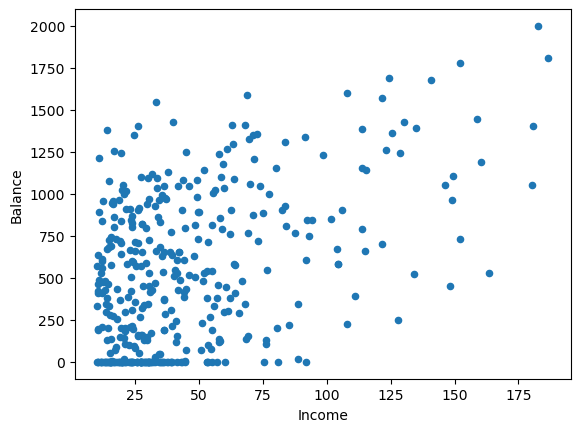

In [6]:
df.plot.scatter(x= 'Income', y='Balance')

Vediamo ora, per confronto, quello fornito da *plotly.express*:

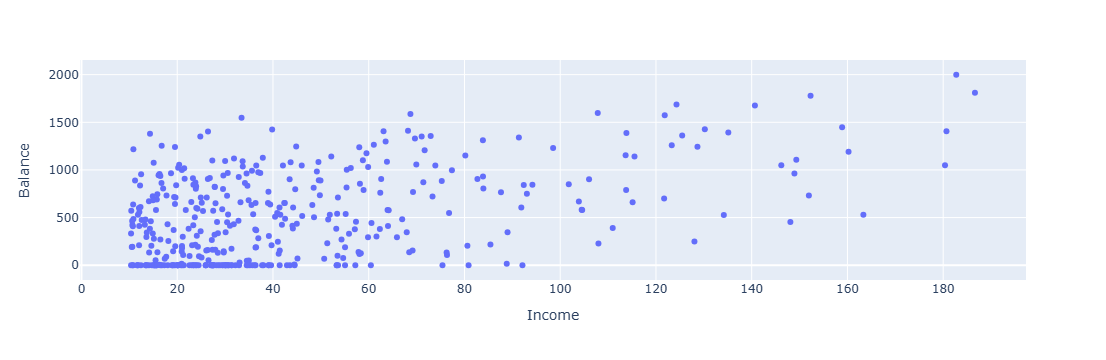

In [22]:
px.scatter(df, x='Income', y='Balance')

Funzionamento:
- zooming: selezione area con tasto sx del mouse; poi click su 'reset axis' per tornare alla vista originale. Oppure tasti di zoom in / zoom out (l'area di zoom è scelta dallo strumento)
- panning: selezione del toggle ancòra; deselezione?
- salvataggio su file png: icona macchina fotografica
- box select: per enfatizzare un'area (rettangolare) del plot (per esempio durante presentazioni); deselezione?
- lasso selection: come la box select ma l'area è un poligono irregolare con forma a nostra scelta. Utile in grafici con molte osservazioni, la lasso consente di "zoomare mentalmente" su un cluster o un'area specifica. Deselezione?
Per de-selezionare rieseguire la cella.

E' possibile **personalizzare la *tool tip***, in modo che mostri, al passaggio del mouse sul punto (*mouse hover*), anche i valori di altre colonne,e  non solo di `Income` e `Balance`;

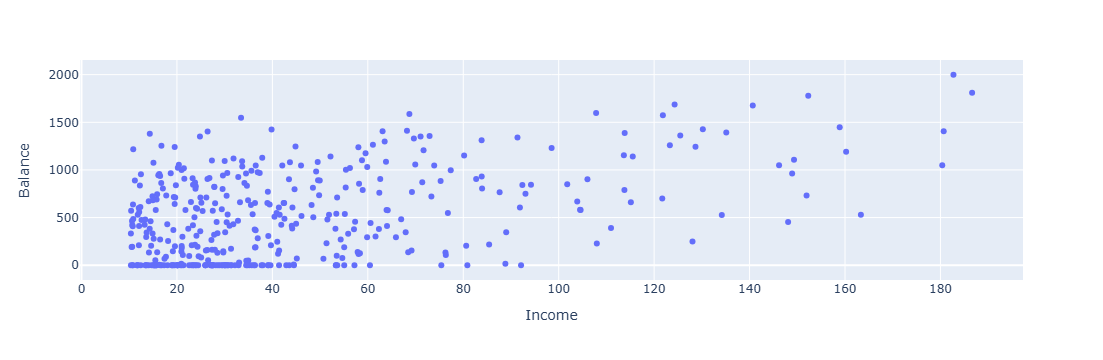

In [8]:
px.scatter(df, x='Income', y='Balance',hover_data=df.columns)

Molto utile è la tool tip dell'indice del dataframe:

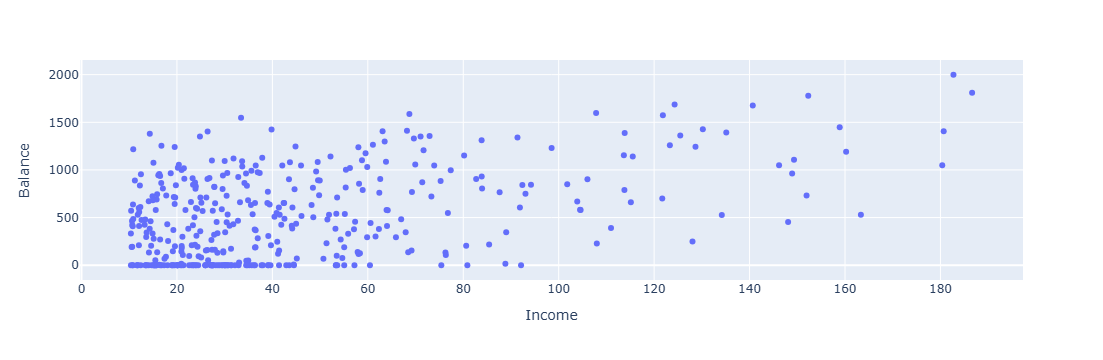

In [9]:
df = df.reset_index()                                            # aggiunge l’indice come colonna chiamata “index”
px.scatter(df, x='Income', y='Balance', hover_data=['index'])

Ok, mi intersssa il cliente 102. Come lo estraggo dal dataframe? Serve fare un **subsetting di riga** con il metodo `iloc` (descritto ampiamente nel notebook *A.Introduzione*).

In [10]:
df.iloc[102]

index              102
Income          68.713
Limit             7582
Rating             531
Cards                2
Age                 56
Education           16
Gender            Male
Student            Yes
Married             No
Ethnicity    Caucasian
Balance           1587
Name: 102, dtype: object

Ora impostiamo dei range per gli assi:

In [11]:
df.describe()

,index,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,0.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,99.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,199.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,299.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,399.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


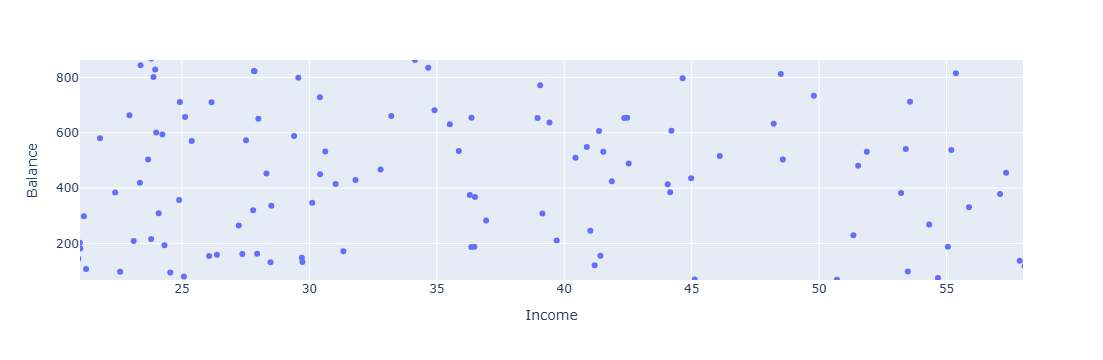

In [12]:
px.scatter(df, x='Income', y='Balance', range_x=[21, 58], range_y=[68,863])  # range presi da describe

I range sono un modo alternativo per fare zoom (stabile).

> Attenzione; i range sono specifici di colonna. Se copio la cella di prima e cambio *x*, non vedo più nulla.

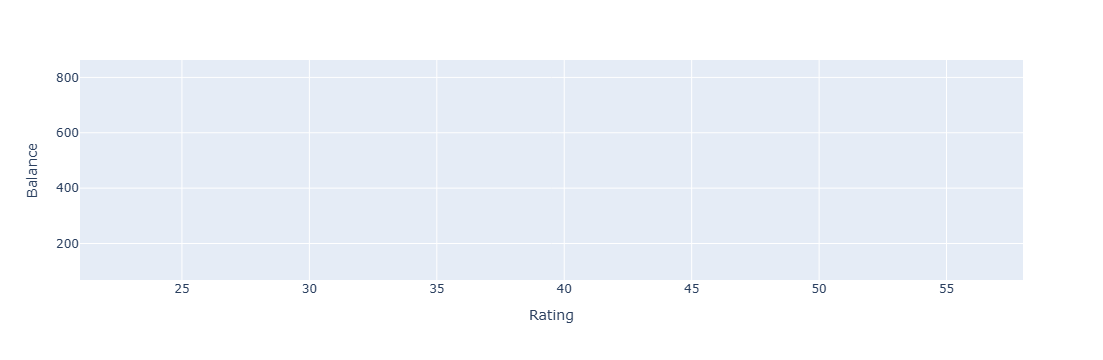

In [13]:
px.scatter(df, x='Rating', y='Balance', range_x=[21, 58], range_y=[68,863])  # range presi da describe

Supponiamo ora di voler visualizzare una **terza dimensione**. E' possibile con uno scatterplot 3D.<br>
In generale, la terza dimensione negli scatterplot è visualizzabile con il **colore** (parametro `color`) oppure il tipo di punto (parametro `symbol`).

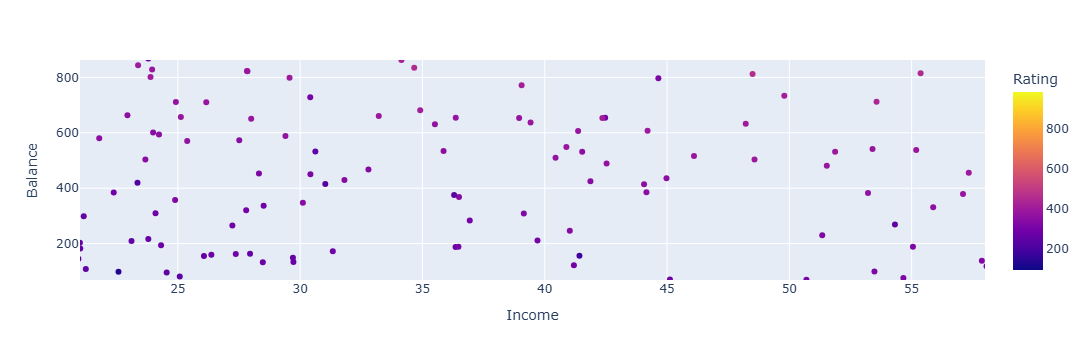

In [14]:
px.scatter(df, x='Income', y='Balance', range_x=[21, 58], range_y=[68,863], color='Rating')

Attenzione alla **legenda** a destra, che è **selezionabile**.<br>
La seguente cella visualizza lo stesso scatterplot con i simboli anzichè i colori. Anch'essa ha la legenda selezionabile/de-selezionabile.

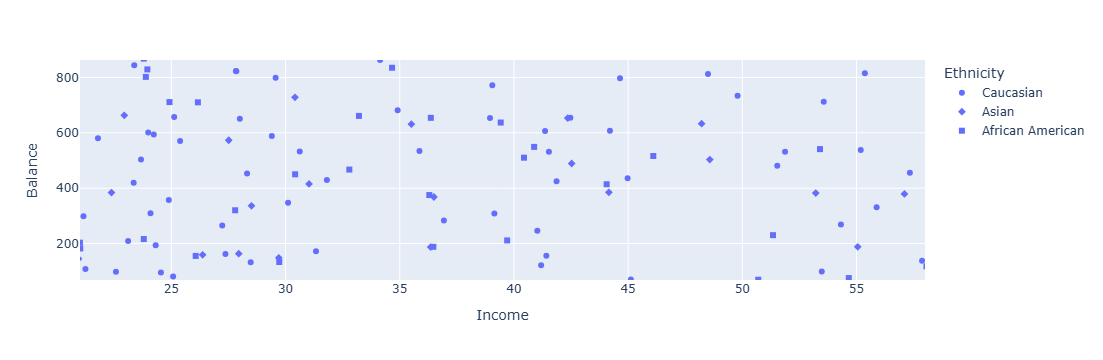

In [15]:
px.scatter(df, x='Income', y='Balance', range_x=[21, 58], range_y=[68,863], symbol='Ethnicity')

In genere la terza dimensione è **categorica**, cioè con un numero limitato di valori. Se è numerica, cioè con un numero potenzialmente infinito di valori, il plot utilizza una **scala continua**.

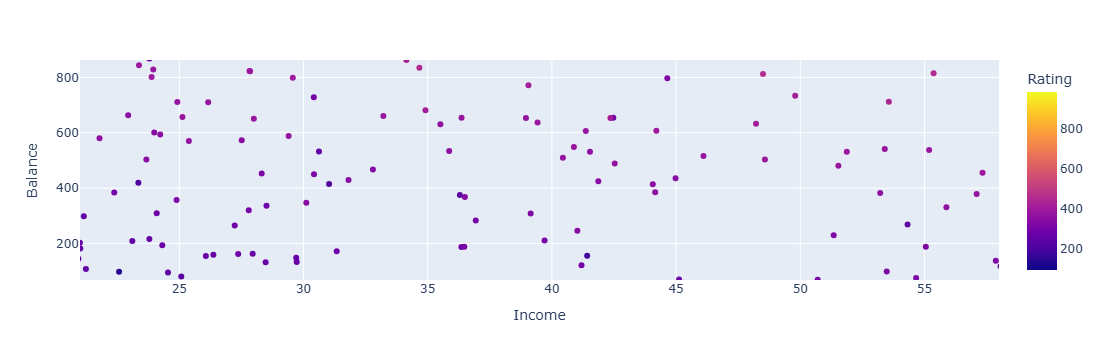

In [16]:
px.scatter(df, x='Income', y='Balance', range_x=[21, 58], range_y=[68,863], color='Rating')

La colonna `Rating` è distribuita in modo assimmetrico negativo, perchè ha una coda destra lunga. Ecco perchèci sono pochi clienti di colore giallo/arancione

## Assi logaritmici
In molti dataset esistono alcune colonne assimmetriche con molta variabilità. Esempi classici sono gli importi economici (fatturato, reddito, ecc). I dati tendono a raggrupparsi in alcune zone del plot. In questi casi possiamo usare le scale logaritmiche.<br>
Per scala logaritmica, vedi [qui](https://it.wikipedia.org/wiki/Scala_logaritmica).<br>
Quella fornita da plotly express è del secondo tipo (mostrato da Wikipedia).

<Axes: >

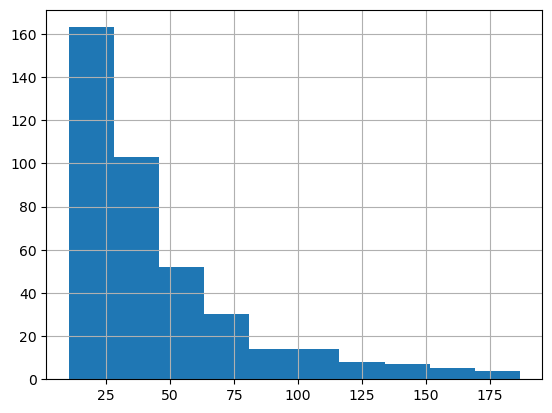

In [17]:
# Effettivamente queste due colonne sono fortemente assimmetriche e dunque beneficiano degli assi logaritmici
df['Income'].hist()
# df['Balance'].hist()

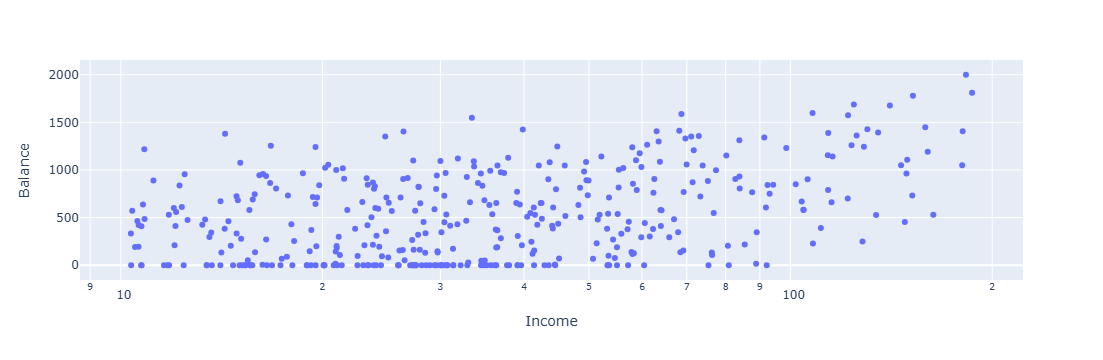

In [18]:
px.scatter(df, x='Income', y='Balance', log_x=True)

`Balance` è visualizzato su scala **lineare**, `Income` su scala **logaritmica**.<br>
Il plot **estende** l'asse X (perchè richiesto con `log_x=True`): i valori nell'intervallo 10-100 (largamente maggioritari) sono visualizzati su uno spazio più ampio; poi seguono i valori nell'intervallo 100-1000. Gli intervalli sono ulteriormente divisi al loro interno.<br>
La scala logaritmica permette un'analisi dei dati, con il relativo mouse hover / tool tip, più precisa.

## Plot laterali

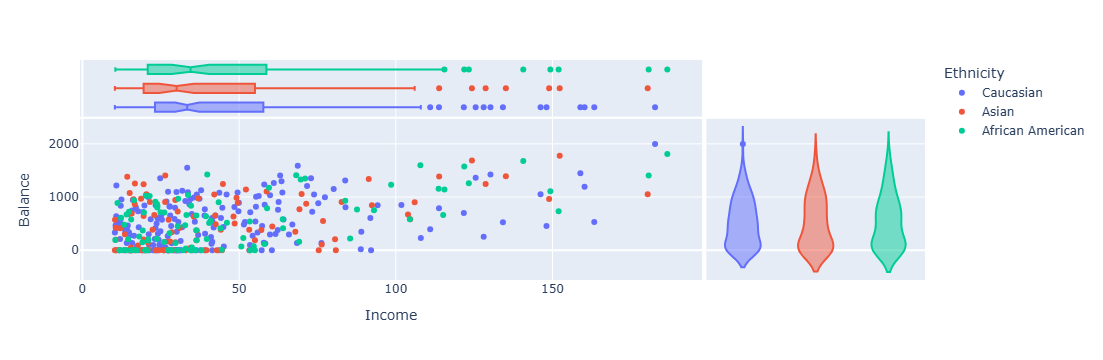

In [19]:
px.scatter(df, x='Income', y='Balance', color='Ethnicity',
          marginal_x='box', marginal_y='violin')

<Axes: >

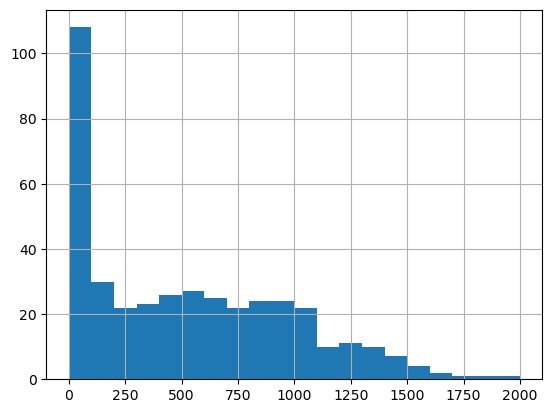

In [20]:
df['Balance'].hist(bins=20)

Lo scatterplot è una vista bi/tri-dimensionale, per definizione, e fornisce informazioni (*insight*) sui trend epermette di inviduare i singoli punti.<br>
I plot marginali invece sono viste **mono-dimensionali**, cioè sono uno schiacciamento dello scatterplot su una sola dimensione (*x* oppure *y*).<br>
Anche i plot marginali hanno tooltip.<br>
Se due o tre valori della variabile categorica `Ethnicity` sono attivati, l'istogramma dell'`Income` è **impilato** (*stacked histogram*)

Abbiamo a disposizione 3 opzioni:
- `histogram`
- `box` (boxplot)
- `violin`

**Baco noto**: in alcuni casi `histogram` non funziona, provare `box` o `violin`.

## Scatter Plot 3D
3+1.<br>
Si usa la funzione `px.scatter_3d` anzichè `px.scatter`.

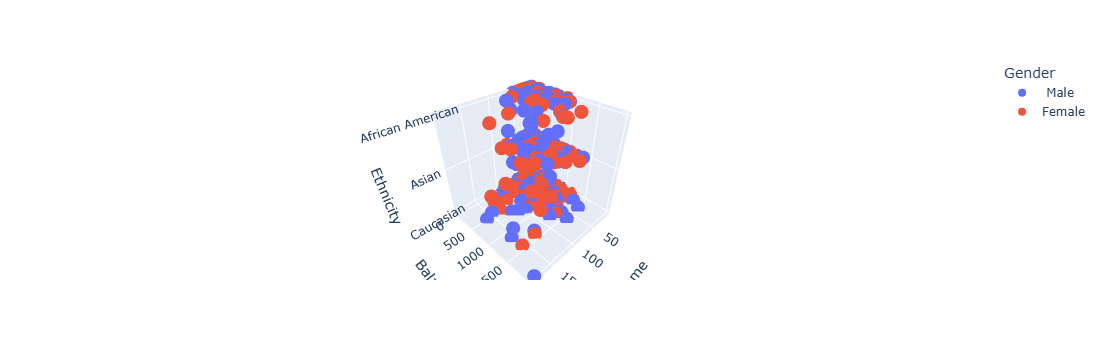

In [21]:
px.scatter_3d(df, x='Income', y='Balance', z='Ethnicity', color='Gender')